In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [31]:
df = pd.read_csv('/content/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [33]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [34]:
df.rename(columns={'ID':'id'},inplace=True)

In [35]:
df.head(5)

,id,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [36]:
df = df.drop(['id', 'Sport'], axis=1)

In [37]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating Women's 500 metres,NaN


# Hence ID variable is pointless and Event variable is the combination of both Sex and Sport, They have been removed from the dataset.

In [39]:
unique_event = pd.unique(df.Event)

In [40]:
unique_event

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

In [41]:
print("Number of unique events: {}".format(len(unique_event)))

Number of unique events: 765


In [45]:
df_copy = df.copy()
height_weight_list = ["Height", "Weight"]

In [49]:
for i in unique_event:
  event_filter = df_copy.Event == i
  df_filtered = df_copy[event_filter]
  for j in height_weight_list:
    mean_value = np.round(np.mean(df_filtered[j]), 2)
    if ~np.isnan(mean_value):
      df_filtered[j] = df_filtered[j].fillna(mean_value)
    else:
      all_mean_val = np.round(np.mean(df[j]), 2)
      df_filtered[j] = df_filtered[j].fillna(all_mean_val)
  df_copy[event_filter] = df_filtered
df = df_copy.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# This for loop is for filling NaN's of both "Height" and "Weight"s with respect to the mean of all height and weight's mean and all kinds of variable's mean.

In [50]:
age_mean = np.round(np.mean(df.Age),2)

In [51]:
age_mean

np.float64(25.56)

In [52]:
df['Age'] = df['Age'].fillna(age_mean)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# Next, athletes who did not have any kinds of medals should be removed from the dataset.

In [54]:
medal_var = df['Medal']
pd.isnull(medal_var).sum()

np.int64(231333)

In [57]:
athletes_medal = ~pd.isnull(medal_var)
athletes_medal

,Medal
0,False
1,False
2,False
3,True
4,False
...,...
271111,False
271112,False
271113,False
271114,False


In [58]:
df = df[athletes_medal]
df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics Men's Individual All-Around,Bronze


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39783 non-null  object 
 1   Sex     39783 non-null  object 
 2   Age     39783 non-null  float64
 3   Height  39783 non-null  float64
 4   Weight  39783 non-null  float64
 5   Team    39783 non-null  object 
 6   NOC     39783 non-null  object 
 7   Games   39783 non-null  object 
 8   Year    39783 non-null  int64  
 9   Season  39783 non-null  object 
 10  City    39783 non-null  object 
 11  Event   39783 non-null  object 
 12  Medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [60]:
df.to_csv("athlete_events_cleaned.csv", index=False)

# In this stage, variables' histogram plots are shown.

In [66]:
def plot_histogram(var):
  plt.figure()
  plt.hist(df[var], bins = 80, color="red")
  plt.xlabel(var)
  plt.ylabel("Frequency")
  plt.title("Data Frequency on {} variable".format(var))
  plt.show()

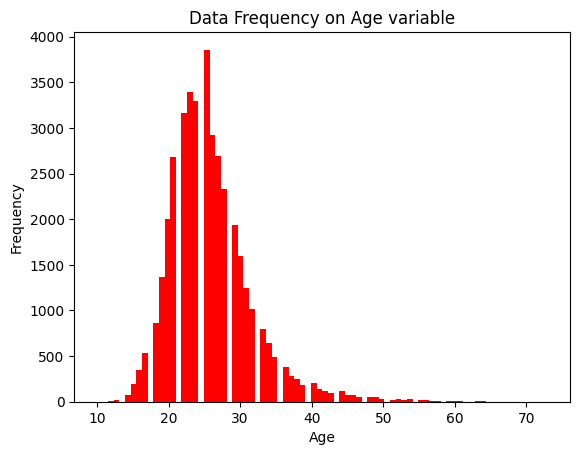

In [67]:
plot_histogram('Age')

In [63]:
def plot_all(df):
  for i in df.columns:
    plot_histogram(i)

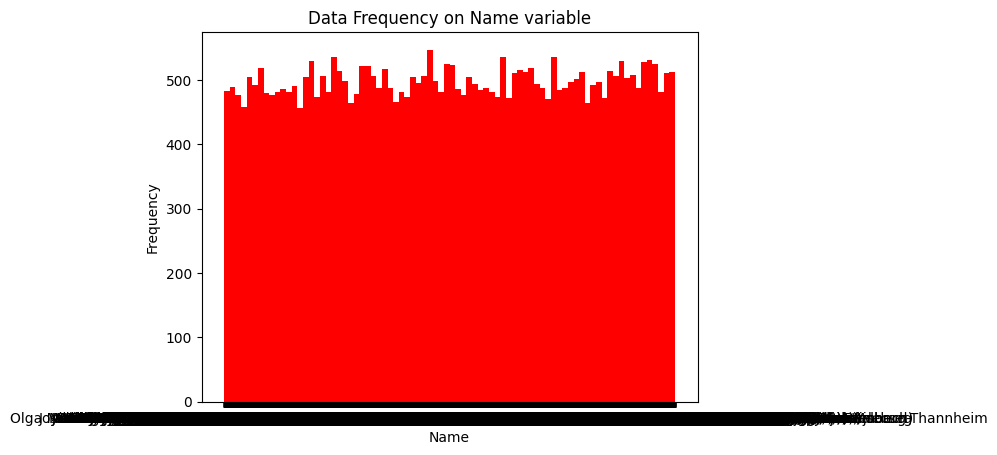

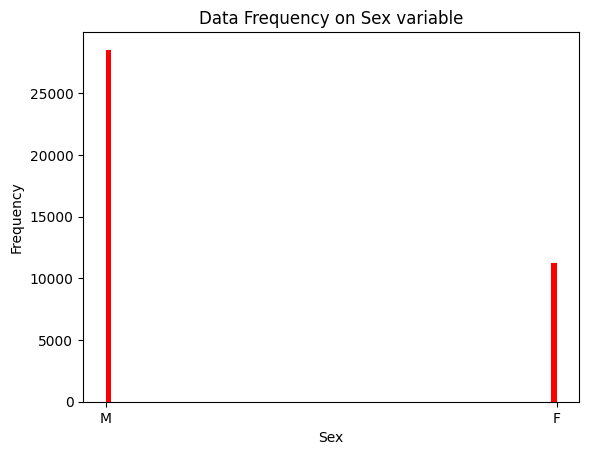

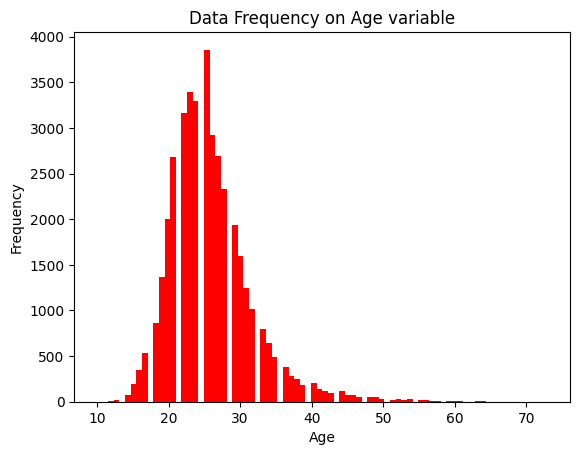

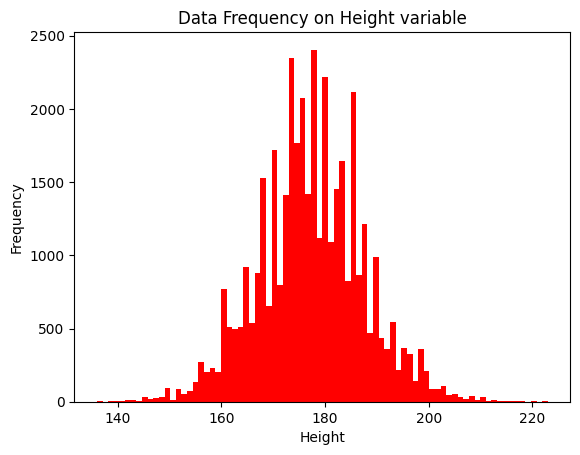

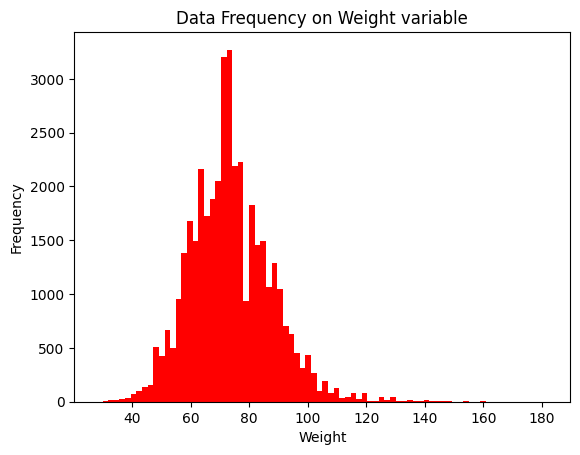

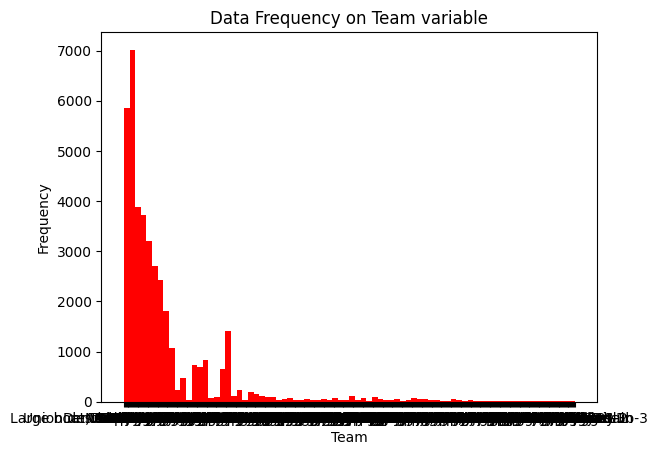

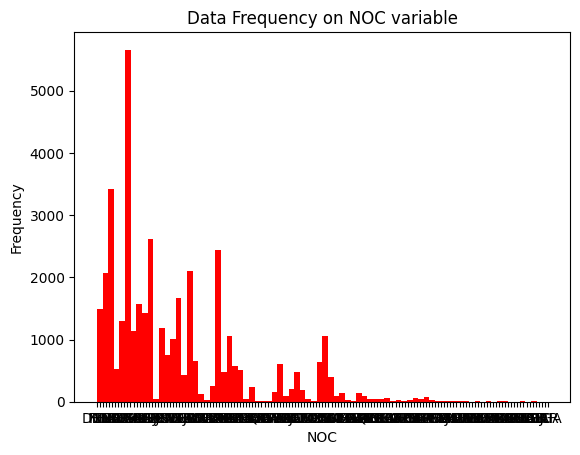

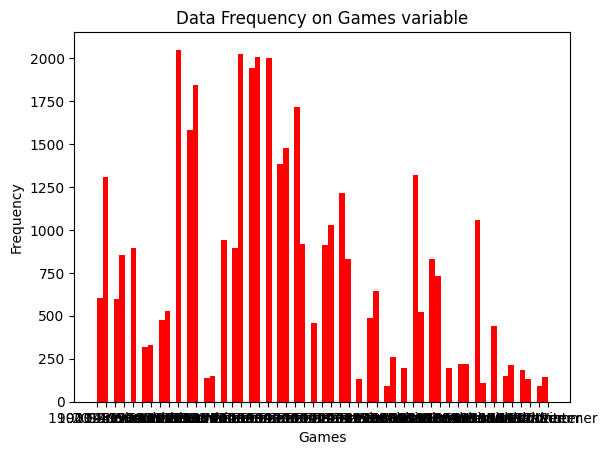

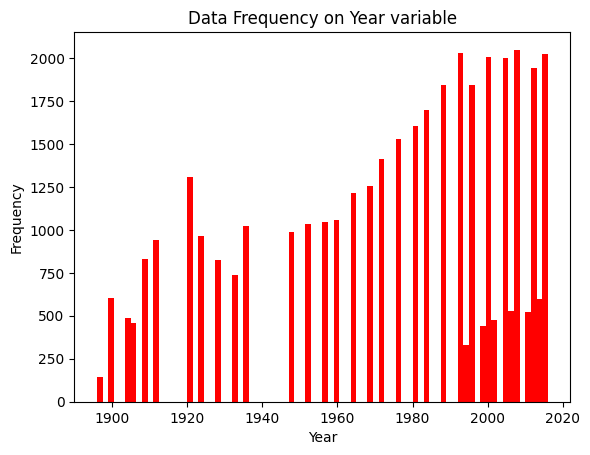

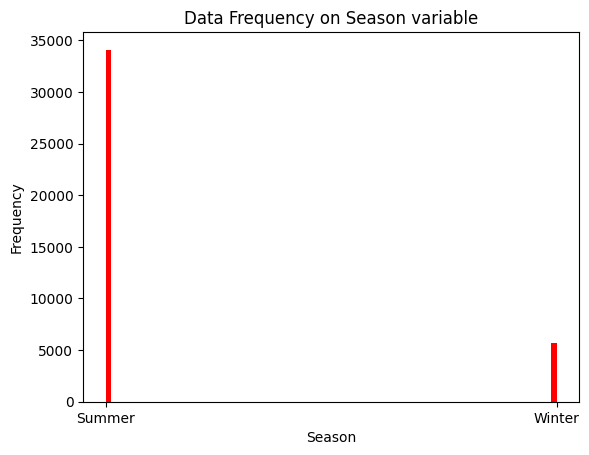

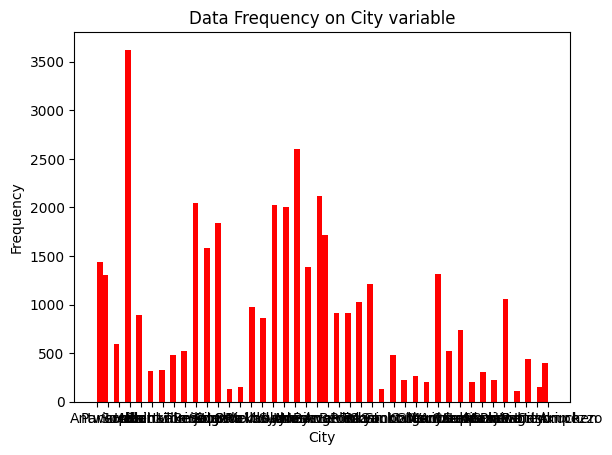

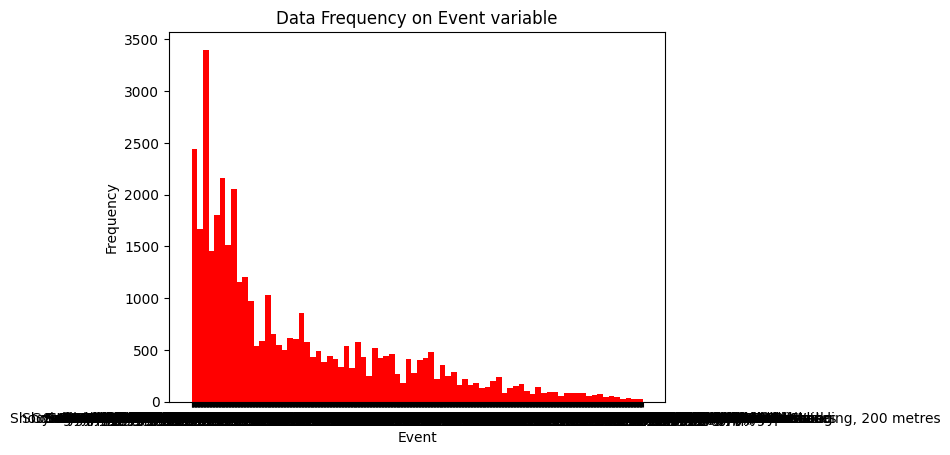

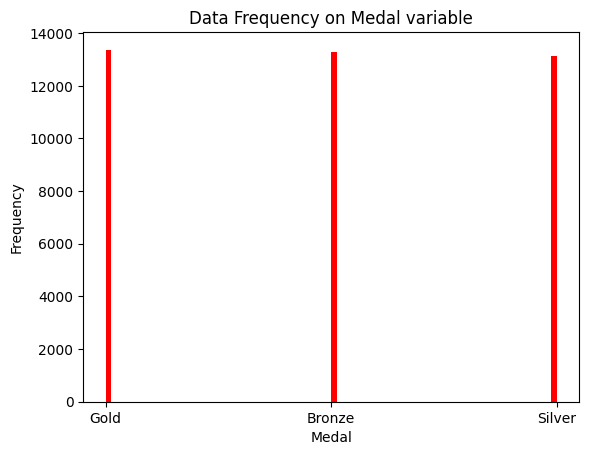

In [68]:
plot_all(df)

In [69]:
numeric_var = ["Age", "Height", "Weight", "Year"]

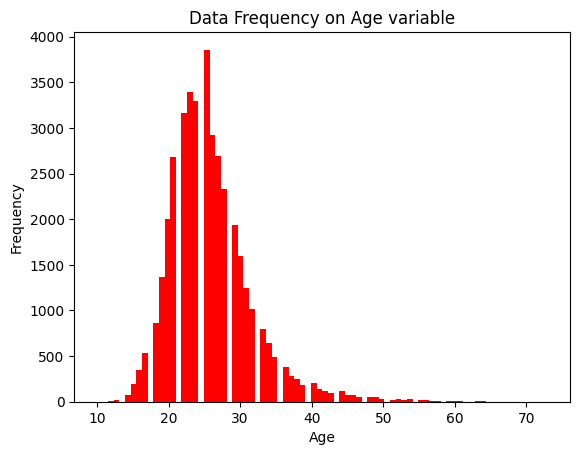

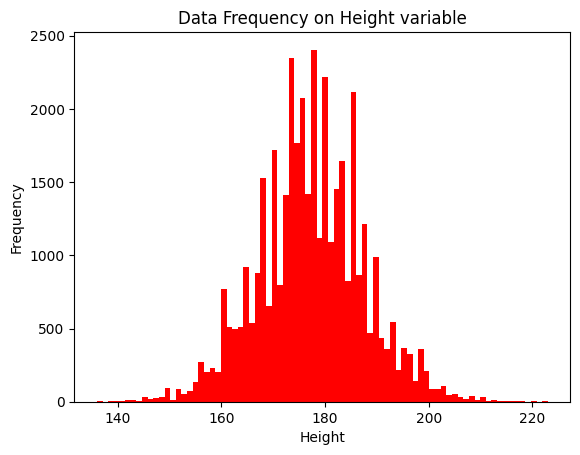

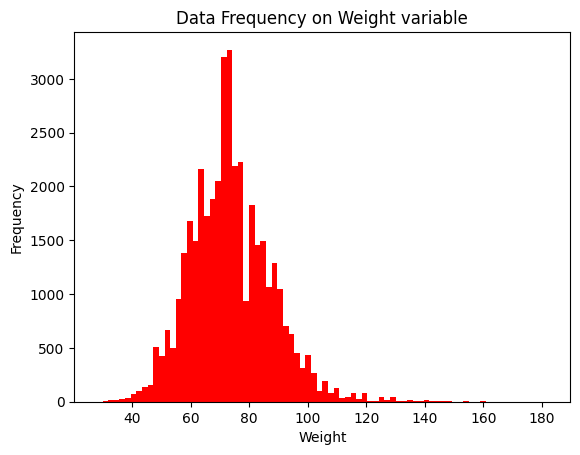

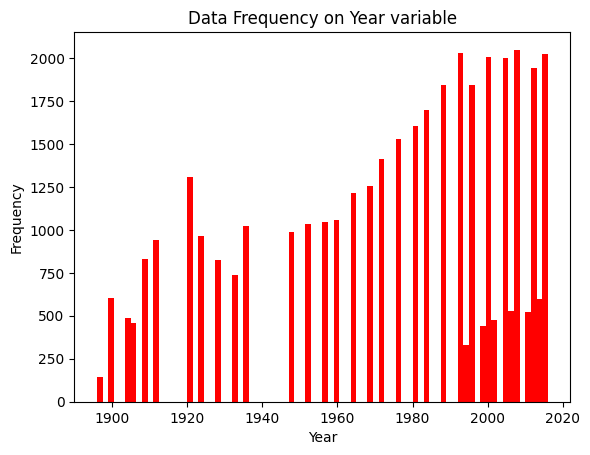

In [70]:
for i in numeric_var:
  plot_histogram(i)

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39783.0,25.918456,5.859569,10.0,22.0,25.00,29.0,73.0
Height,39783.0,177.335575,10.170346,136.0,170.0,177.48,184.0,223.0
Weight,39783.0,73.741318,13.978398,28.0,64.0,73.00,82.0,182.0
Year,39783.0,1973.943845,33.822857,1896.0,1952.0,1984.00,2002.0,2016.0


In [73]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics Men's Individual All-Around,Bronze


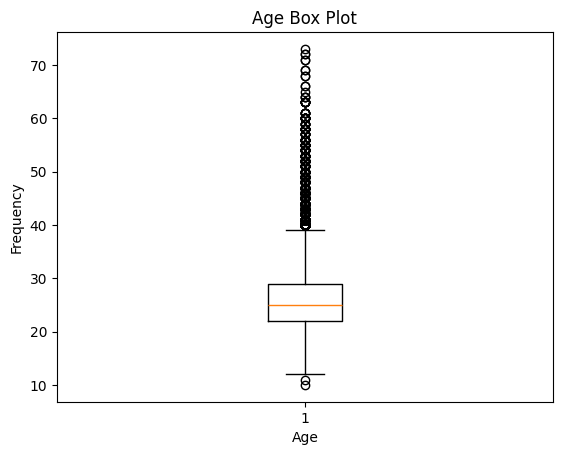

In [74]:
plt.boxplot(df.Age)
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Now, for categorical variables, bar charts are shown

In [77]:
def plot_bar(var, n = 10):
  df_ = df[var]
  df_counts = df_.value_counts()
  df_counts = df_counts[:n]
  plt.figure()
  plt.bar(df_counts.index, df_counts, color = "maroon")
  plt.xticks(df_counts.index, df_counts.index.values, rotation = 45)
  plt.ylabel("Frequency")
  plt.title("Data Frequency on {} variable".format(var))
  plt.show()
  print("{}: \n {}".format(var, df_counts))

In [78]:
categorical_var = ["Name", "City", "Sex", "Team", "NOC", "Games", "Season", "Event", "Medal"]

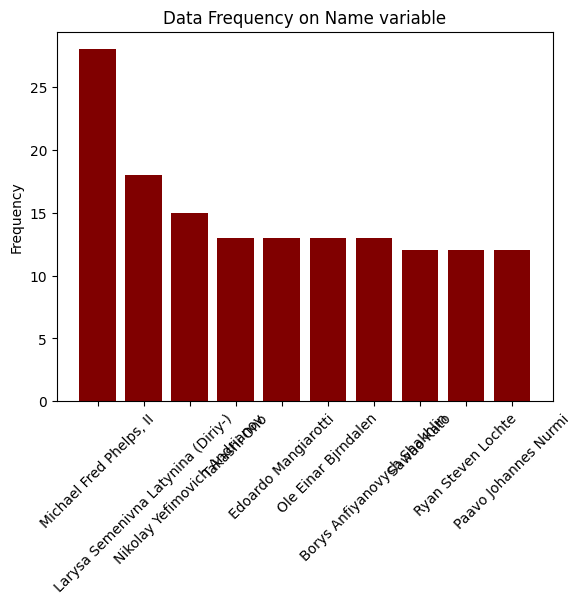

Name: 
 Name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Takashi Ono                           13
Edoardo Mangiarotti                   13
Ole Einar Bjrndalen                   13
Borys Anfiyanovych Shakhlin           13
Sawao Kato                            12
Ryan Steven Lochte                    12
Paavo Johannes Nurmi                  12
Name: count, dtype: int64


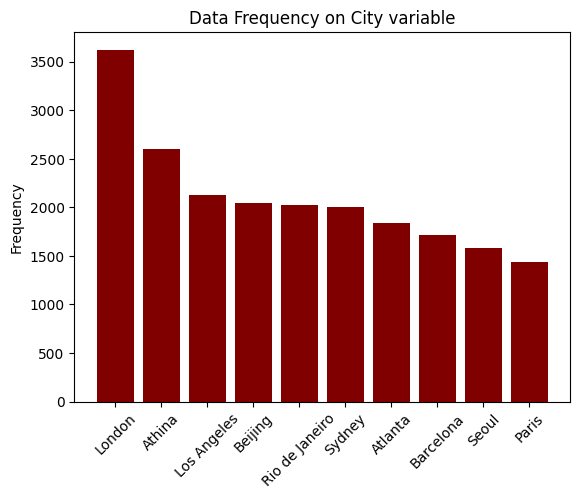

City: 
 City
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Sydney            2004
Atlanta           1842
Barcelona         1712
Seoul             1582
Paris             1436
Name: count, dtype: int64


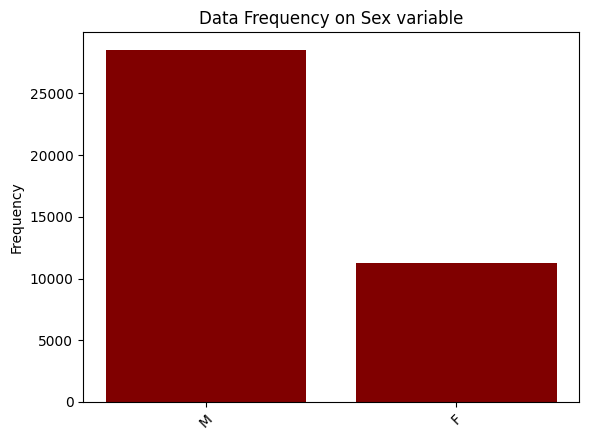

Sex: 
 Sex
M    28530
F    11253
Name: count, dtype: int64


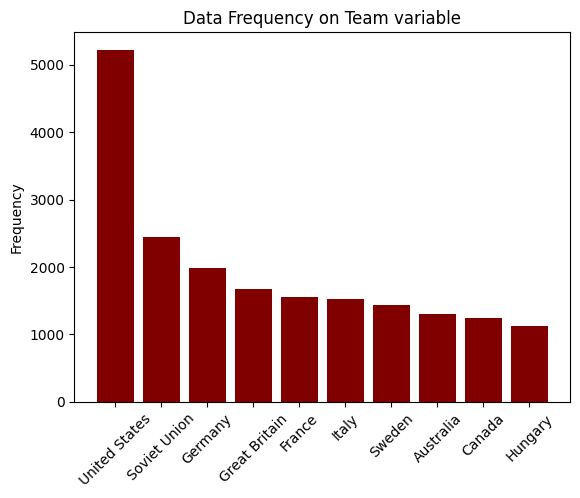

Team: 
 Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: count, dtype: int64


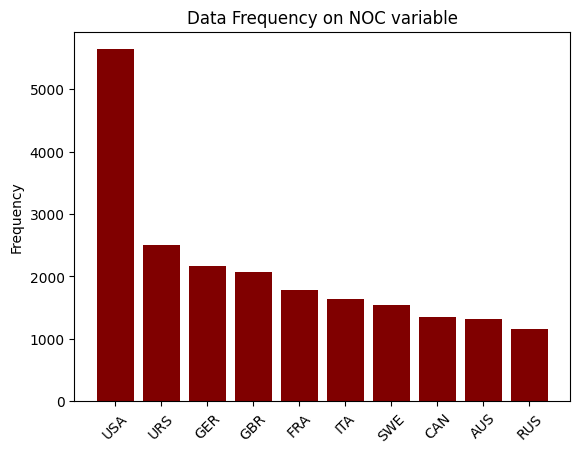

NOC: 
 NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: count, dtype: int64


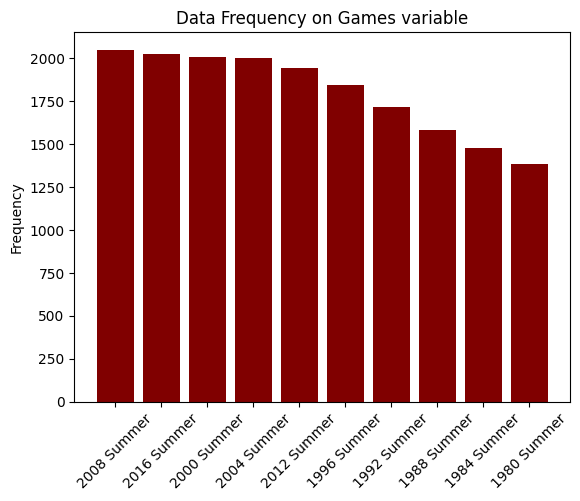

Games: 
 Games
2008 Summer    2048
2016 Summer    2023
2000 Summer    2004
2004 Summer    2001
2012 Summer    1941
1996 Summer    1842
1992 Summer    1712
1988 Summer    1582
1984 Summer    1476
1980 Summer    1384
Name: count, dtype: int64


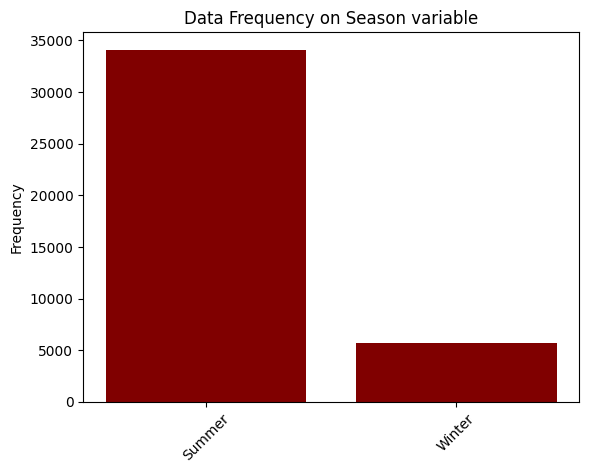

Season: 
 Season
Summer    34088
Winter     5695
Name: count, dtype: int64


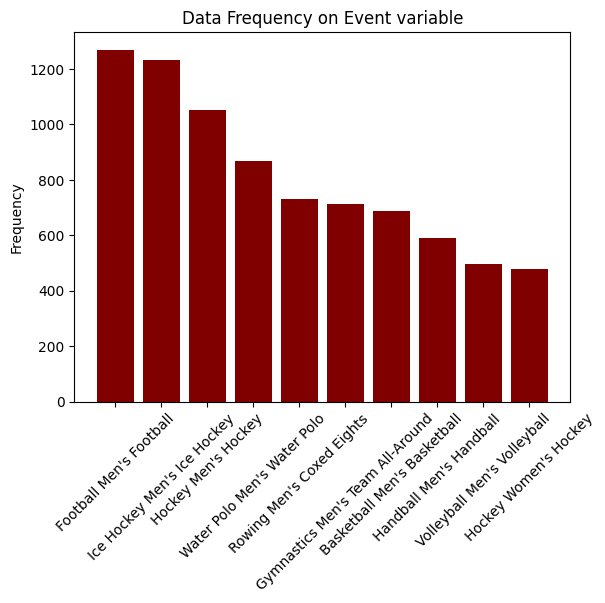

Event: 
 Event
Football Men's Football             1269
Ice Hockey Men's Ice Hockey         1230
Hockey Men's Hockey                 1050
Water Polo Men's Water Polo          866
Rowing Men's Coxed Eights            730
Gymnastics Men's Team All-Around     713
Basketball Men's Basketball          687
Handball Men's Handball              588
Volleyball Men's Volleyball          495
Hockey Women's Hockey                478
Name: count, dtype: int64


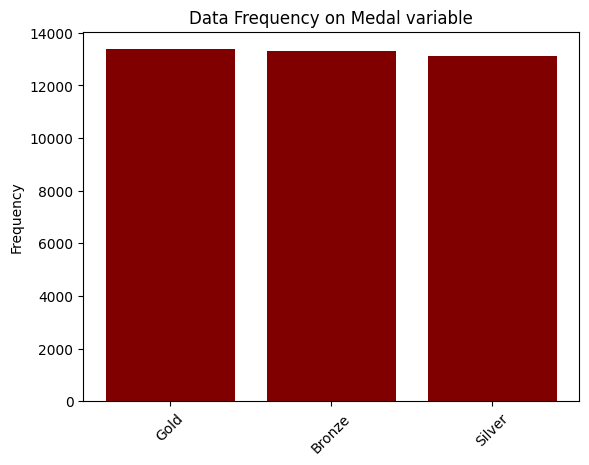

Medal: 
 Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [79]:
for i in categorical_var:
  plot_bar(i)

# Now, correlated variables' analysis are shown (e.g. height comparison between sex, medal comparison based on events and so on)

In [80]:
male = df[df.Sex == "M"]
male.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics Men's Individual All-Around,Bronze


In [81]:
female = df[df.Sex == "F"]
female.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics Women's Javelin Throw,Silver


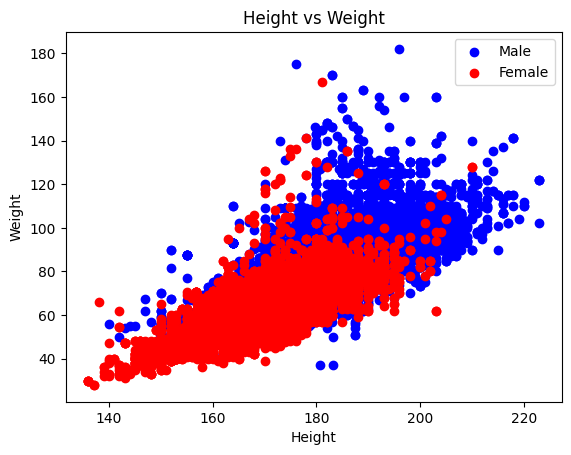

In [88]:
plt.figure()
plt.scatter(male.Height, male.Weight, alpha = 1, color = "blue", label = "Male")
plt.scatter(female.Height, female.Weight, alpha = 1, color = "red", label = "Female")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.legend()
plt.show()

In [93]:
df.loc[:, ["Age", "Height", "Weight"]].corr()

,Age,Height,Weight
Age,1.000000,0.061789,0.136610
Height,0.061789,1.000000,0.794356
Weight,0.136610,0.794356,1.000000


# Medal distribution is analyzed based on athletes' age

In [94]:
df_copy = df.copy()
df_copy = pd.get_dummies(df_copy, columns = ["Medal"])
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal_Bronze,Medal_Gold,Medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,False,True,False
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming Men's 200 metres Breaststroke,True,False,False
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming Men's 400 metres Breaststroke,True,False,False
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey Men's Ice Hockey,True,False,False
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics Men's Individual All-Around,True,False,False


In [95]:
df_copy.loc[:, ["Age", "Medal_Bronze", "Medal_Gold", "Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.005584,-0.002576,0.008192
Medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
Medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
Medal_Silver,0.008192,-0.496859,-0.499022,1.000000


# After that, teams' success rate over medals is observed. In this section, the code identifies how many medals do a single team get (e.g. USA's counts on how many Gold medals they won, how many Silver medals they won and how many Bronze medals they won)

In [100]:
df_copy.loc[:, ["Team", "Medal_Bronze", "Medal_Silver", "Medal_Gold"]].groupby("Team").sum().sort_values(by="Medal_Gold", ascending=False).head(10)

,Medal_Bronze,Medal_Silver,Medal_Gold
Team,,,
United States,1233,1512,2474
Soviet Union,677,716,1058
Germany,678,627,679
Italy,484,508,535
Great Britain,572,582,519
France,577,518,455
Sweden,507,476,451
Hungary,365,330,432
Canada,408,413,422


# In that stage, this code identifies which medal is given in which city (e.g. 2012 Gold Medal is given to USA in Brazil)

In [101]:
df_copy.loc[:, ["City", "Medal_Bronze", "Medal_Silver", "Medal_Gold"]].groupby("City").sum().sort_values(by="Medal_Gold", ascending=False).head(10)

,Medal_Bronze,Medal_Silver,Medal_Gold
City,,,
London,1214,1195,1215
Athina,860,859,883
Los Angeles,706,691,726
Beijing,710,667,671
Rio de Janeiro,703,655,665
Sydney,680,661,663
Atlanta,629,605,608
Barcelona,604,549,559
Seoul,549,513,520


# In that stage, this code identifies which sex is won which medal (The medal count comparison between women and men athletes)


In [102]:
df_copy.loc[:, ["Sex", "Medal_Bronze", "Medal_Silver", "Medal_Gold"]].groupby("Sex").sum().sort_values(by="Medal_Gold", ascending=False)

,Medal_Bronze,Medal_Silver,Medal_Gold
Sex,,,
M,9524,9381,9625
F,3771,3735,3747


# Multi Variable Data Analysis

# Pivot Table

In [106]:
df_pivot = df.pivot_table(index = "Medal", columns = "Sex",
                                values = ["Age", "Height", "Weight"],
                                aggfunc = {"Height": np.mean, "Weight": np.mean,
                                           "Age": [min, max, np.std]})

In [108]:
df_pivot.T

Medal                Bronze        Gold      Silver
            Sex                                    
Age    max  F     69.000000   63.000000   55.000000
            M     72.000000   64.000000   73.000000
       min  F     12.000000   13.000000   11.000000
            M     10.000000   13.000000   13.000000
       std  F      5.329229    5.219615    5.253111
            M      5.870340    5.987807    6.098221
Height mean F    170.003068  170.448487  170.233655
            M    180.044748  180.317136  180.052002
Weight mean F     62.757401   63.199754   62.867170
            M     77.844771   78.191143   77.965142

# Anomaly Detection

# Outlier (Misleading) Values

In [116]:
def anomalyDetection(df, prop):
  outlier_indices = []

  for i in prop:
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
  return multiple_outliers

In [117]:
df_anomaly = df.loc[anomalyDetection(df, ["Age", "Height", "Weight"])]

In [119]:
df_anomaly.Event.value_counts()

,count
Event,
Basketball Men's Basketball,62
Gymnastics Women's Team All-Around,21
Handball Men's Handball,6
Gymnastics Women's Uneven Bars,6
Gymnastics Women's Balance Beam,3
Sailing Mixed Two Person Keelboat,2
Basketball Women's Basketball,2
Diving Women's Platform,2
Athletics Men's Hammer Throw,2
